## Chapter 1: Import necessary libraires<a class="anchor" id="chapter1"></a>

In [1]:
import re
import nltk
import numpy as np 
import pandas as pd 
import seaborn as sns 
import tensorflow as tf
import plotly.express as px
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\weeki\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Chapter 2: Load dataset<a class="anchor" id="chapter2"></a>

In [2]:
# load and read dataset
news_df = pd.read_csv("dataset/WELFake_Dataset.csv")

### 2.1 Information about the datasets<a class="anchor" id="2.1"></a>

In [3]:
news_df.head()

Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1

In [4]:
news_df.tail()

Unnamed: 0                                              title  \
72129       72129  Russians steal research on Trump in hack of U....   
72130       72130   WATCH: Giuliani Demands That Democrats Apolog...   
72131       72131  Migrants Refuse To Leave Train At Refugee Camp...   
72132       72132  Trump tussle gives unpopular Mexican leader mu...   
72133       72133  Goldman Sachs Endorses Hillary Clinton For Pre...   

                                                    text  label  
72129  WASHINGTON (Reuters) - Hackers believed to be ...      0  
72130  You know, because in fantasyland Republicans n...      1  
72131  Migrants Refuse To Leave Train At Refugee Camp...      0  
72132  MEXICO CITY (Reuters) - Donald Trump’s combati...      0  
72133  Goldman Sachs Endorses Hillary Clinton For Pre...      1

In [5]:
news_df.info(memory_usage = True, verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [6]:
#check duplicated data 
news_df.duplicated().sum()

0

In [7]:
# counts the number of occurrences of each unique value in the "label" column (before)
news_df["label"].value_counts()

1    37106
0    35028
Name: label, dtype: int64

In [8]:
# checking the number of null/missing values in the dataset
news_df.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [9]:
# drop missing values
news_df=news_df.dropna()

In [10]:
# counts the number of occurrences of each unique value in the "label" column (after)
news_df["label"].value_counts()

1    36509
0    35028
Name: label, dtype: int64

In [11]:
news_df.shape

(71537, 4)

## Chapter 3: Data Visualization<a class="anchor" id="chapter3"></a>

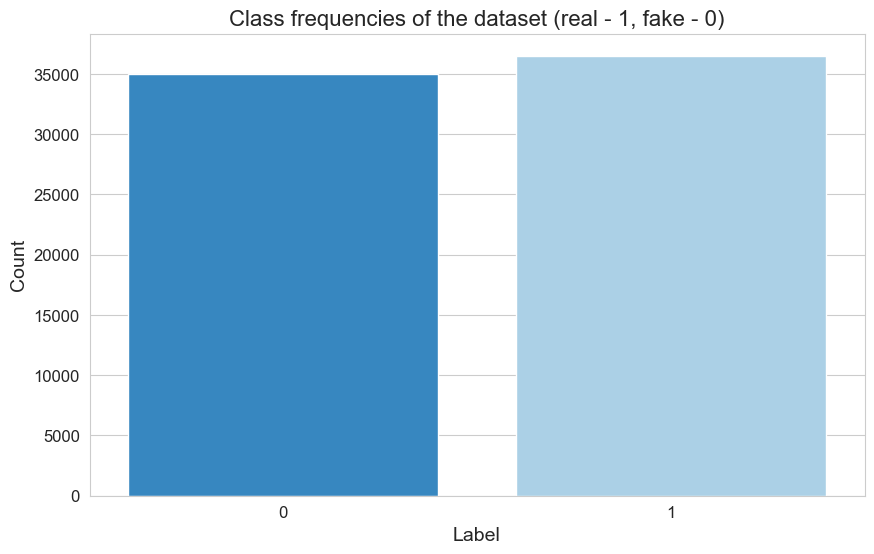

In [12]:
# Create bar plot of label frequencies
plt.figure(figsize=[10, 6])
sns.set_style("whitegrid")
ax = sns.barplot(x=news_df["label"].value_counts().index,
                 y=news_df["label"].value_counts(),
                 palette="Blues_r",
                 saturation=1)

# Set plot title and axis labels
plt.title("Class frequencies of the dataset (real - 1, fake - 0)", fontsize=16)
plt.xlabel("Label", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Set font sizes for x and y tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display plot
plt.show()

In [13]:
# Create pie chart of label counts
fig = px.pie(data_frame=news_df,
             names="label",
             hole=0.4,
             title="Distribution of Labels (Real - 1, Fake - 0)",
             width=1000,
             height=500,
             color_discrete_sequence=px.colors.sequential.Sunset_r,
             labels={"label": "Label", "": "Count"})

# Add text labels showing count and percentage for each label
fig.update_traces(textposition="inside",
                  textinfo="label+percent",
                  marker=dict(line=dict(width=1.2, color="#000000")))

# Add legend to the chart
fig.update_layout(legend=dict(title=None, orientation="h", y=0.8, yanchor="bottom", x=0.8),
                  title_x=0.5,
                  title_font=dict(size=30),
                  uniformtext_minsize=25)

# Show the chart
fig.show()

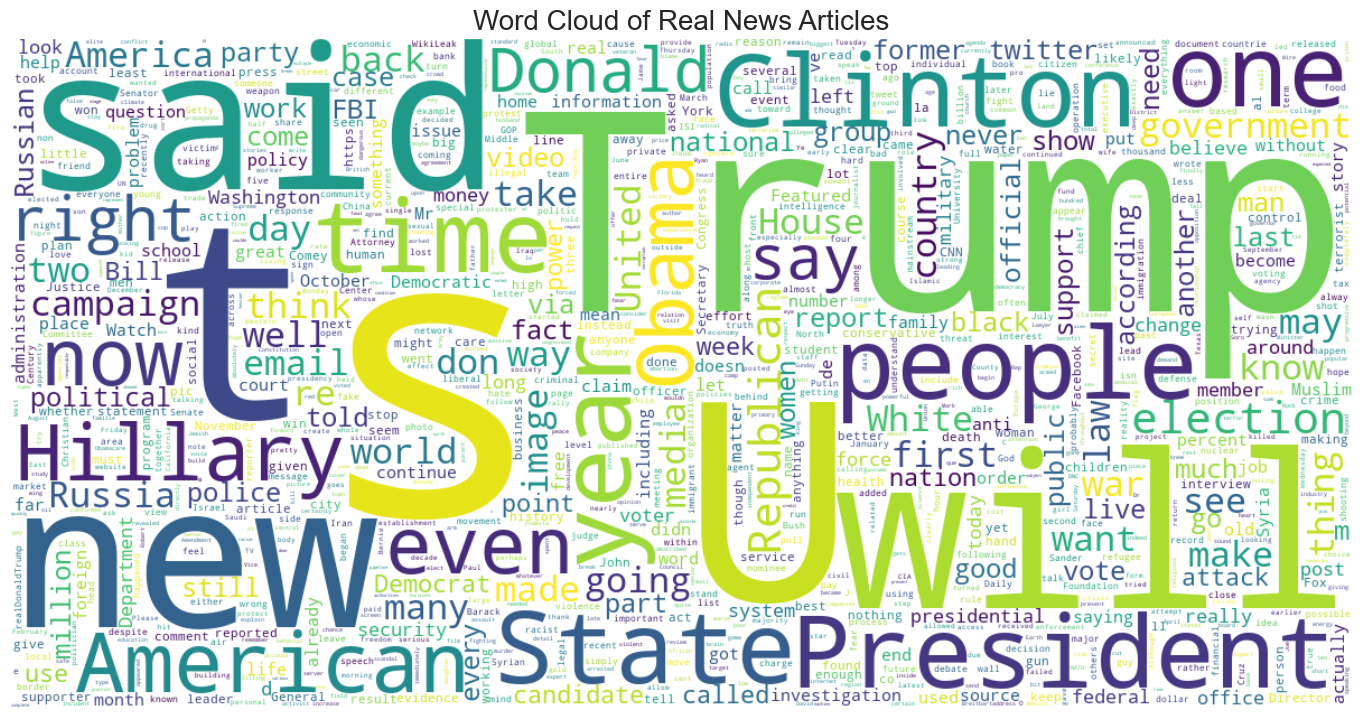

In [14]:
# Get text for "real" news articles
real_text = " ".join(i for i in news_df[news_df.label == 1].text)

# Generate word cloud
wc = WordCloud(background_color="white",
               width=1200,
               height=600,
               contour_width=0,
               contour_color="red",
               max_words=1000,
               scale=1,
               collocations=False,
               repeat=True,
               min_font_size=1)

wc.generate(real_text)

# Plot the word cloud
plt.figure(figsize=[15, 7])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Real News Articles", fontsize=20)
plt.tight_layout(pad=0)
plt.show()

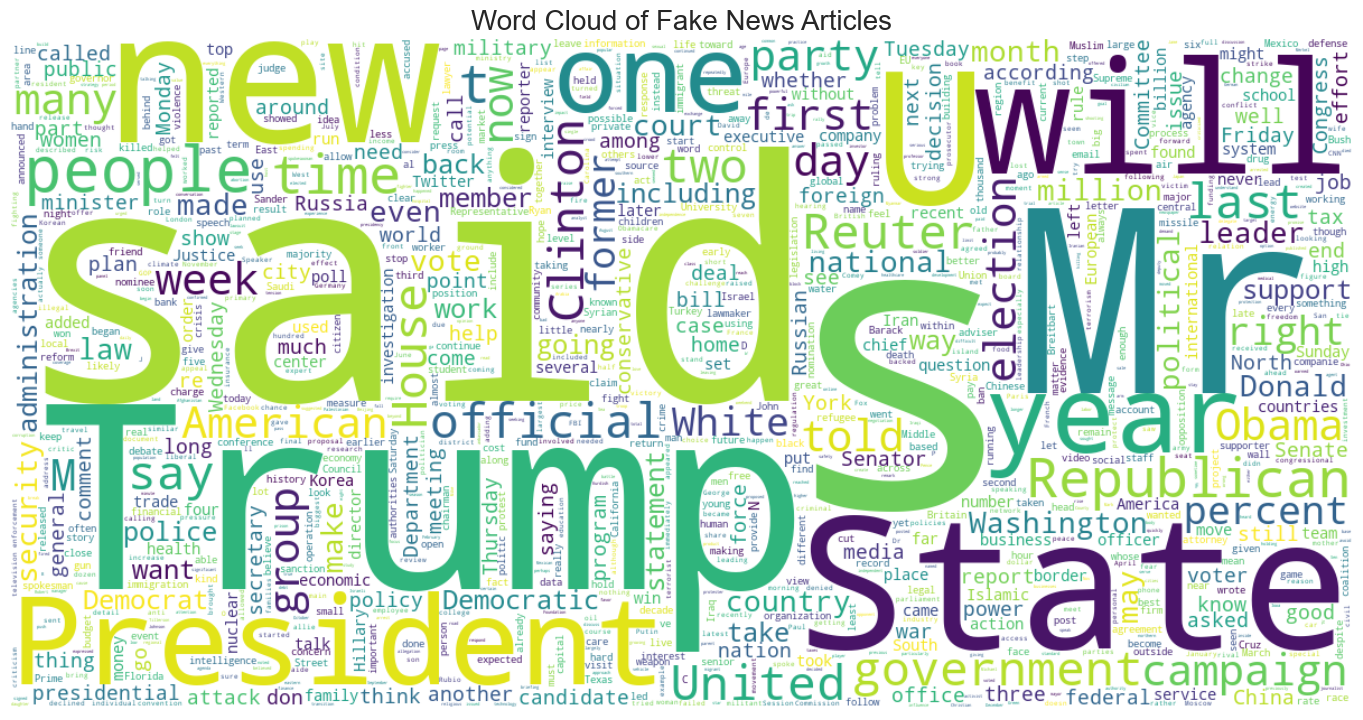

In [15]:
# Get text for "fake" news articles
fake_text = " ".join(i for i in news_df[news_df.label == 0].text)

# Generate word cloud
wc = WordCloud(background_color="white",
               width=1200,
               height=600,
               contour_width=0,
               contour_color="red",
               max_words=1000,
               scale=1,
               collocations=False,
               repeat=True,
               min_font_size=1)

wc.generate(fake_text)

# Plot the word cloud
plt.figure(figsize=[15, 7])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Fake News Articles", fontsize=20)
plt.tight_layout(pad=0)
plt.show()

## Chapter 4: Data Preprocessing<a class="anchor" id="chapter4"></a>

In [16]:
# Remove unnecessary columns
news_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [17]:
#Combine title with the text
news_df['text'] = news_df['title'] + news_df['text']
news_df.drop('title', axis=1, inplace=True)

In [18]:
#Split the data into X and Y
X = news_df['text']
Y = news_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=18)

In [19]:
def preprocessing(data):
    processed = []
    for text in data:
        #remove HTML Tags
        text = re.sub('https?://\S+|www\.\S+', '', text)
        #remove punctuations marks
        text = re.sub('[^\w\s]', ' ', text)
        #remove numbers
        text = re.sub('\d', '', text)
        #remove single character
        text = re.sub(' \b[a-zA-Z]\b', '', text)
        #remove multiple spaces
        text = re.sub(' +', ' ', text)
        #remove single quote
        text = re.sub("'", '', text)
        #remove non-alphanumeric characters
        text = re.sub("[^a-zA-Z0-9]", ' ', text)
        
        processed.append(text)
    return processed

In [20]:
#Apply data preprocessing
X_train = preprocessing(X_train)
X_test = preprocessing(X_test)

In [21]:
#Tokenizer
max_vocab = 10000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(X_train)

In [22]:
# tokenize the text into vectors 
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

## Chapter 5: Model Training<a class="anchor" id="chapter5"></a>

In [23]:
# ensure that all input sequences have the same length
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post', maxlen=256)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post', maxlen=256)

In [24]:
#Define Model
rnn_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab, 128),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         1280000   
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               18560     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [25]:
#Train model
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
rnn_model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  optimizer=tf.keras.optimizers.Adam(1e-4),
                  metrics=['accuracy'])

history = rnn_model.fit(X_train, y_train, epochs=10,validation_split=0.25, batch_size=30, shuffle=True, callbacks=[early_stop])

Epoch 1/10
1431/1431 [==============================] - 534s 369ms/step - loss: 0.3243 - accuracy: 0.8422 - val_loss: 0.1776 - val_accuracy: 0.9379
Epoch 2/10
1431/1431 [==============================] - 513s 358ms/step - loss: 0.1415 - accuracy: 0.9506 - val_loss: 0.1463 - val_accuracy: 0.9477
Epoch 3/10
1431/1431 [==============================] - 583s 408ms/step - loss: 0.0919 - accuracy: 0.9705 - val_loss: 0.1412 - val_accuracy: 0.9510
Epoch 4/10
1431/1431 [==============================] - 505s 353ms/step - loss: 0.0608 - accuracy: 0.9813 - val_loss: 0.1521 - val_accuracy: 0.9532
Epoch 5/10
1431/1431 [==============================] - 505s 353ms/step - loss: 0.0394 - accuracy: 0.9889 - val_loss: 0.1731 - val_accuracy: 0.9524


## Chapter 6: Model Evaluation<a class="anchor" id="chapter6"></a>

In [26]:
#set Parameter
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

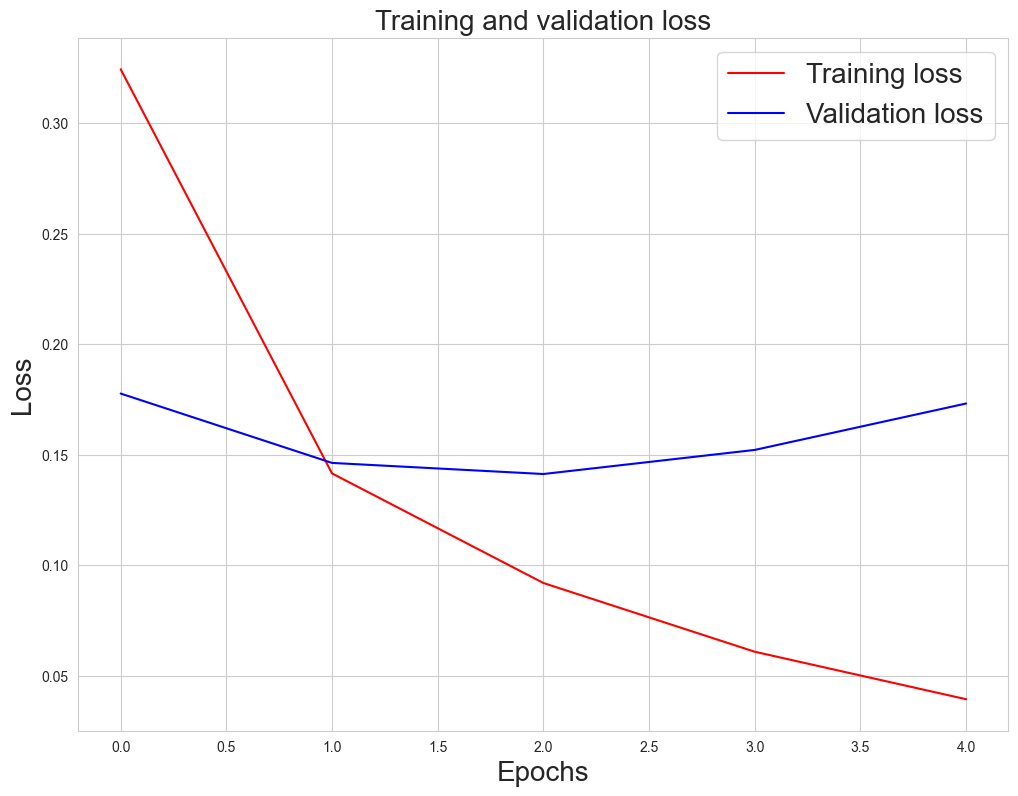

In [27]:
#Training and validation loss
plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss', size=20)
plt.legend(prop={'size': 20})
plt.show()

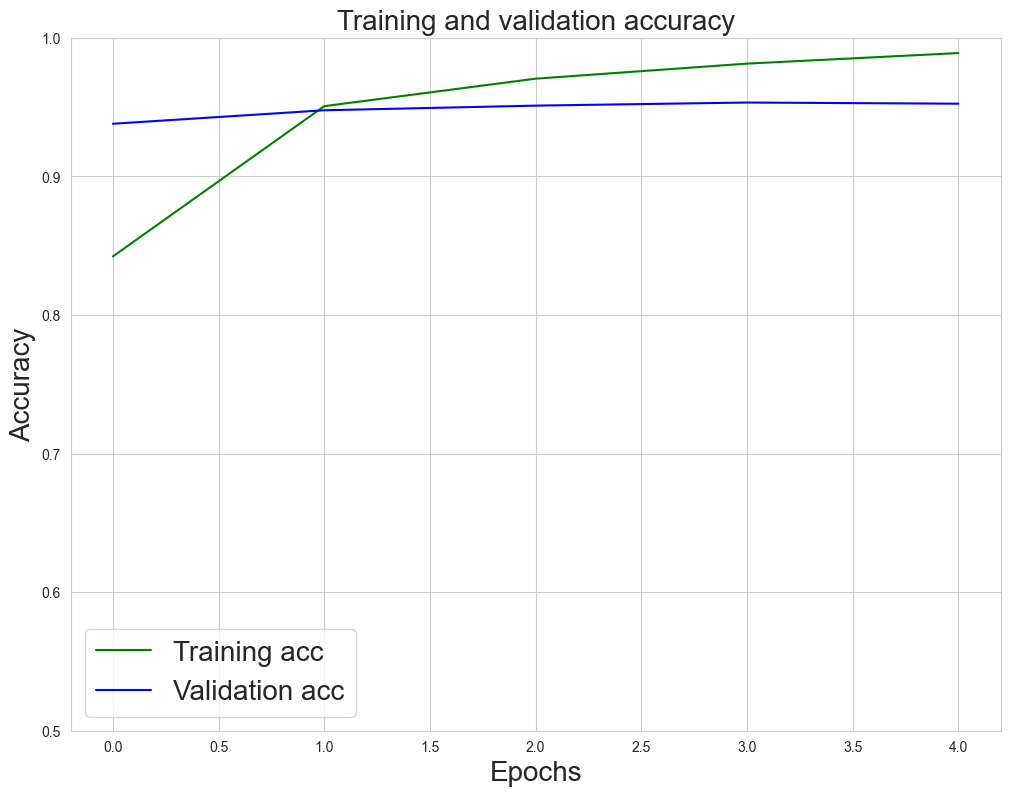

In [28]:
# Training and validation accuracy
plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(prop={'size': 20})
plt.ylim((0.5,1))
plt.show()

In [29]:
#Evaluate model
test_loss, test_acc = rnn_model.evaluate(X_test, y_test, batch_size=30)
print("\nTest accuracy: %.2f%%" % (100.0 * test_acc))
print("\nTest lost    :",test_loss)

477/477 [==============================] - 34s 72ms/step - loss: 0.1395 - accuracy: 0.9502

Test accuracy: 95.02%

Test lost    : 0.13945446908473969


In [30]:
# make prediction
pred = rnn_model.predict(X_test)

predictions = []

for i in pred:
    if i >= 0.5:
        predictions.append(1)
    else:
        predictions.append(0) 

448/448 [==============================] - 35s 75ms/step


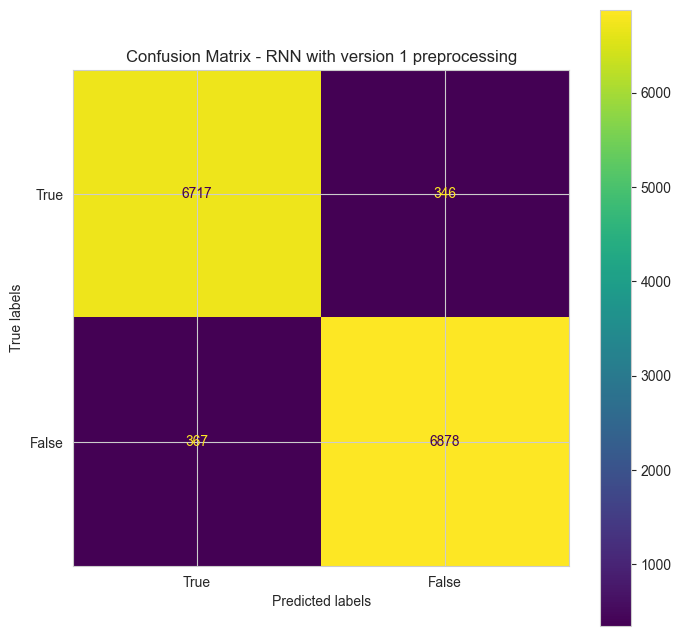

In [31]:
#Confusion Matrix(no pre-processing version)
cm = confusion_matrix(y_test, predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[True,False])

fig, ax = plt.subplots(figsize=(8, 8))
cm_display.plot(ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - RNN with version 1 preprocessing')

plt.show()

In [32]:
# Accuracy, Precision, Recall, F1-Score
print('Accuracy on testing set: {:.2f}%'.format(accuracy_score(predictions, y_test)*100))
print('Precision on testing set: {:.2f}%'.format(precision_score(predictions, y_test)*100))
print('Recall on testing set: {:.2f}%'.format(recall_score(predictions, y_test)*100))
print('F1-Score on testing set: {:.2f}%'.format(f1_score(predictions, y_test)*100))

Accuracy on testing set: 95.02%
Precision on testing set: 94.93%
Recall on testing set: 95.21%
F1-Score on testing set: 95.07%


AUC-ROC score: 0.9501783465716762


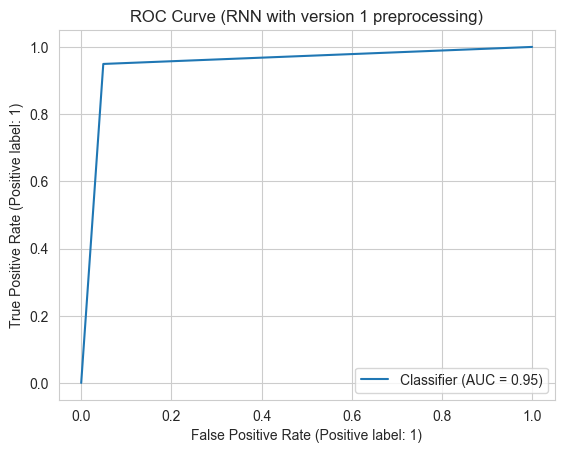

In [33]:
# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, predictions)
print('AUC-ROC score:', auc_roc)

# Plot the ROC curve
roc_display = RocCurveDisplay.from_predictions(y_test, predictions)
plt.title('ROC Curve (RNN with version 1 preprocessing)')
plt.show()